<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/LinearRegressionWithAnimation_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

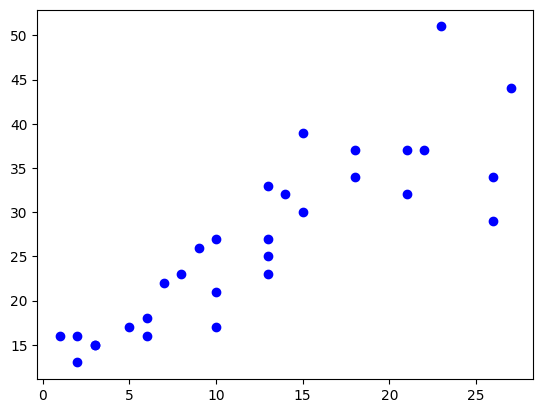

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

X,Y =np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/pizza.txt",skiprows=1, unpack=True)

ax.plot(X,Y, "bo")

def graph(X1,Y1, id):
    ax.set_xlim(0, id)
    ax.cla()
    ax.plot(X1,Y1, "bo")
    line1, = ax.plot(X1,X1, 'b-')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.5)
    return line1


def updateLine(X1,Y1,theLine):
    theLine.set_ydata(Y1)
    theLine.set_xdata(X1)
    display(fig)
    clear_output(wait = True)
    #plt.pause(0.5)



In [16]:
def showHistory(X,Y,historyW, step=2):
  theLine=graph(X,Y,1)
  updateLineL = lambda w :  updateLine(X,predict(X,w[0],w[1]),theLine)
  for i in range(0,len(historyW),step):
    w=historyW[i]
    updateLineL(w)
  updateLineL(historyW[-1])

def predict(X, w,b):
  return X * w + b

def loss(X,Y,w,b):
  error = predict(X,w,b)-Y
  squared_error = error ** 2
  return np.average(squared_error)

def train(iterations, X,Y, lr):
  w=b=0
  historyW=[]
  for i in range(iterations):
    historyW.append([w,b])
    tmpLoss=loss(X,Y,w,b)
    print(f"\n iteration={i} bias={b} loss={tmpLoss}")
    if(loss(X,Y,w+lr,b)<tmpLoss):
      w+=lr
    elif(loss(X,Y,w-lr,b)<tmpLoss):
      w-=lr
    elif(loss(X,Y,w,b+lr)<tmpLoss):
      b+=lr
    elif(loss(X,Y,w,b-lr)<tmpLoss):
      b-=lr
    else:
      return [w,b, historyW]
  raise Exception(f"cannot convey after {iterations} iterations")

w,b, history =train(20000, X,Y, 0.01)
print(f"\nw={w}, b={b}")
print(f"Prediction: x=20, Y=>{predict(20, w,b)}")



 iteration=0 bias=0 loss=812.8666666666667

 iteration=1 bias=0 loss=804.8205466666666

 iteration=2 bias=0 loss=796.8181866666666

 iteration=3 bias=0 loss=788.8595866666668

 iteration=4 bias=0 loss=780.9447466666668

 iteration=5 bias=0 loss=773.0736666666668

 iteration=6 bias=0 loss=765.2463466666667

 iteration=7 bias=0 loss=757.4627866666666

 iteration=8 bias=0 loss=749.7229866666669

 iteration=9 bias=0 loss=742.0269466666667

 iteration=10 bias=0 loss=734.3746666666665

 iteration=11 bias=0 loss=726.7661466666667

 iteration=12 bias=0 loss=719.2013866666668

 iteration=13 bias=0 loss=711.6803866666667

 iteration=14 bias=0 loss=704.2031466666667

 iteration=15 bias=0 loss=696.7696666666667

 iteration=16 bias=0 loss=689.3799466666668

 iteration=17 bias=0 loss=682.0339866666666

 iteration=18 bias=0 loss=674.7317866666667

 iteration=19 bias=0 loss=667.4733466666668

 iteration=20 bias=0 loss=660.2586666666667

 iteration=21 bias=0 loss=653.0877466666666

 iteration=22 bias=

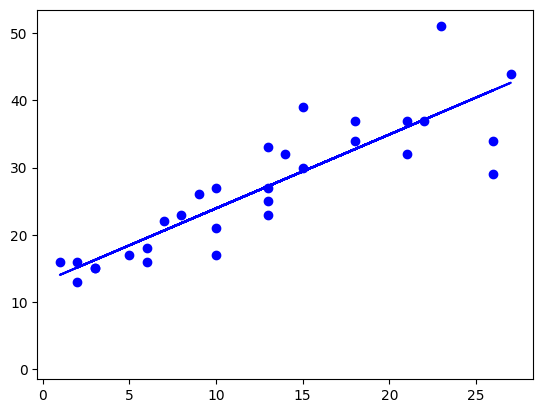

In [17]:
showHistory(X,Y, history,5)

In [25]:
print(f"Prediction: x=3, Y=>{predict(100, w,b)}")

Prediction: x=3, Y=>122.92999999999984
